In [3]:
import sklearn

In [4]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

print(newsgroups_train.data[0])
print(newsgroups_train.target_names[newsgroups_train.target[0]])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
rec.autos


In [5]:
for i in range(5):
    print(i+1,'.\n')   
    print(newsgroups_train.data[i],'\n')
    print("----------------------------------------------------------------------------------\n")

1 .

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail. 

----------------------------------------------------------------------------------

2 .

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to

In [6]:
df = newsgroups_train.data
type(df)

list

### Preprocessing Data

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
from sklearn.model_selection import train_test_split

In [9]:
import re
import pandas as pd
import numpy as np

In [10]:
df = pd.DataFrame(df, columns=['text'])

In [11]:
contractions_dict = {
    "I'm": "I am",
    "You're": "You are",
    "He's": "He is",
    "She's": "She is",
    "It's": "It is",
    "We're": "We are",
    "They're": "They are",
    "I've": "I have",
    "You've": "You have",
    "We've": "We have",
    "They've": "They have",
    "I'd": "I would",
    "You'd": "You would",
    "He'd": "He would",
    "She'd": "She would",
    "We'd": "We would",
    "They'd": "They would",
    "I'll": "I will",
    "You'll": "You will",
    "He'll": "He will",
    "She'll": "She will",
    "We'll": "We will",
    "They'll": "They will",
    "Isn't": "Is not",
    "Aren't": "Are not",
    "Wasn't": "Was not",
    "Weren't": "Were not",
    "Haven't": "Have not",
    "Hasn't": "Has not",
    "Hadn't": "Had not",
    "Won't": "Will not",
    "Wouldn't": "Would not",
    "Don't": "Do not",
    "Doesn't": "Does not",
    "Didn't": "Did not",
    "Can't": "Cannot",
    "Couldn't": "Could not",
    "Shouldn't": "Should not",
    "Mightn't": "Might not",
    "Mustn't": "Must not"
}

# Define the expand_contractions function
def expand_contractions(text, contractions_dict):
    contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

df['text'] = df['text'].apply(lambda x:expand_contractions(x, contractions_dict))

In [12]:
df['text'][0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [13]:
import nltk
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

stop_words = set(stopwords.words('english'))

In [14]:
def remove_stopwords(article):
    "Return the articel after remvoing stopwords"
    article_tokens = word_tokenize(article) 
    filtered_article = [word for word in article_tokens if not word in stop_words] 
    return " ".join(filtered_article)


#removing stopwords
df['text'] = df['text'].apply(remove_stopwords)

#removing Punctuations 
df['text'] = df['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#removing digits
df['text'] = df['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#changing to lower
df['text'] = df['text'].apply(lambda x: x.lower()) 

In [15]:
df['text'][0]

'i wondering anyone could enlighten car i saw day  it  sports car  looked late  early   it called bricklin  the doors really small  in addition  front bumper separate rest body  this i know  if anyone tellme model name  engine specs  years production  car made  history  whatever info funky looking car  please email '

In [16]:
import spacy
nlp = spacy.load('en_core_web_sm')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

In [17]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
    # Tokenize the input text
    tokens = word_tokenize(text)
    
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the lemmatized tokens back into a single string
    return " ".join(lemmatized_tokens)

#lemmatize the articles
df['text'] = df['text'].apply(lambda x: lemmatize(x))

In [18]:
df['text'][0]

'i wondering anyone could enlighten car i saw day it sport car looked late early it called bricklin the door really small in addition front bumper separate rest body this i know if anyone tellme model name engine spec year production car made history whatever info funky looking car please email'

### Training LDA Model

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
text_data_vectorized = vectorizer.fit_transform(df['text'])

# Fit the LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=0)
lda_model.fit(text_data_vectorized)

LatentDirichletAllocation(random_state=0)

### Attaching Topics

In [20]:
# Transform the document-term matrix using the fitted LDA model
topic_values = lda_model.transform(text_data_vectorized)
# len(topic_values)
# Assign the dominant topic to each document
df['Topic'] = topic_values.argmax(axis=1)


In [21]:
df

,text,Topic
0,i wondering anyone could enlighten car i saw d...,5
1,a fair number brave soul upgraded si clock osc...,9
2,well folk mac plus finally gave ghost weekend ...,9
3,do weitek s addressphone number i would like g...,9
4,from article worldstdcom tombaker worldstdcom ...,0
...,...,...
11309,dn from nyeda cnsvaxuwecedu david nye dn a neu...,3
11310,i old mac mac plus problem their screen blank ...,9
11311,i installed cpu clone motherboard tried mounti...,9
11312,would require hypersphere in point specifies s...,2


In [22]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda_model, vectorizer.get_feature_names_out(), 10)

Topic #0:
space file db entry program output image line launch use
Topic #1:
ah air mv gordon mm mw ww bank md mt
Topic #2:
god nt people say think jesus christian know believe like
Topic #3:
people nt armenian government state right time think israel jew
Topic #4:
gun key law use encryption government chip file right state
Topic #5:
nt know like think time car good year going said
Topic #6:
ax max pl bhj giz wm gk sl bj ql
Topic #7:
file available information program use window email list server version
Topic #8:
game team year player play season new league hockey win
Topic #9:
drive nt problem card window use like know disk thanks


### Training BERT Model

In [43]:
from tqdm import tqdm, trange
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
# train_data = train_data.reset_index(drop=True)
document_embeddings = model.encode(df['text'])

In [44]:
document_embeddings

array([[-0.05554537,  0.11665782,  0.03461354, ...,  0.0287255 ,
         0.01467352,  0.12068182],
       [ 0.00491327,  0.04431281,  0.01484229, ...,  0.00852905,
        -0.02885393, -0.0451769 ],
       [-0.05137725, -0.02371524,  0.06012754, ..., -0.11601766,
        -0.06874914,  0.06208714],
       ...,
       [-0.00034938, -0.00993472,  0.04333503, ...,  0.02153501,
        -0.03533256, -0.09268977],
       [ 0.02579167,  0.00203848, -0.06093338, ...,  0.0316413 ,
        -0.03309611, -0.03376598],
       [-0.06405723,  0.04394216,  0.02441195, ...,  0.00820607,
         0.02799004, -0.07684395]], dtype=float32)

In [45]:
len(document_embeddings)

11314

In [46]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

from sklearn.cluster import KMeans

# Set the number of clusters (topics)
num_clusters = 10

# Perform K-Means clustering
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(document_embeddings)

# Assign cluster labels to each document
cluster_labels = clustering_model.labels_

In [47]:
cluster_labels = cluster_labels.flatten() if hasattr(cluster_labels, 'shape') and len(cluster_labels.shape) > 1 else cluster_labels

# assert len(text_data) == len(cluster_labels), "train_data and cluster_labels must have the same length."

df['cluster'] = cluster_labels

for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    print(df[df['cluster'] == cluster_num]['text'])


Cluster 0:
3        do weitek s addressphone number i would like g...
13       description external tank option ssf redesign ...
14       reduced price i list thing forsale behalf brot...
18       i would like able amplify voltage signal outpu...
22       the catalog personal computing tool engineer s...
                               ...                        
11286    the hga nt reflective wavelength might cook fo...
11293    the following posted friend you send reply ema...
11301    i alesis drum machine sale it includes velocit...
11307    hi since could also seller well buyer i would ...
11308    thanks many offer review book if received revi...
Name: text, Length: 1605, dtype: object
Cluster 1:
21       i think mike foligno captain sabre got traded ...
27               doug robert ken hill nl mvp let s go spos
40       ted re missing vital point a roger lustig poin...
43       for second straight game california scored ton...
44       in case i think viola would made better sign

In [48]:
df

,text,cluster,lda_topic
0,i wondering anyone could enlighten car i saw d...,6,5
1,a fair number brave soul upgraded si clock osc...,4,9
2,well folk mac plus finally gave ghost weekend ...,4,9
3,do weitek s addressphone number i would like g...,0,9
4,from article worldstdcom tombaker worldstdcom ...,5,0
...,...,...,...
11309,dn from nyeda cnsvaxuwecedu david nye dn a neu...,9,3
11310,i old mac mac plus problem their screen blank ...,4,9
11311,i installed cpu clone motherboard tried mounti...,4,9
11312,would require hypersphere in point specifies s...,7,2


In [49]:
# Get the top words for each topic
for index, topic in enumerate(lda_model.components_):
    print(f"Top 10 words for Topic #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")


Top 10 words for Topic #0
['use', 'launch', 'line', 'image', 'output', 'program', 'entry', 'db', 'file', 'space']


Top 10 words for Topic #1
['mt', 'md', 'bank', 'ww', 'mw', 'mm', 'gordon', 'mv', 'air', 'ah']


Top 10 words for Topic #2
['like', 'believe', 'know', 'christian', 'jesus', 'think', 'say', 'people', 'nt', 'god']


Top 10 words for Topic #3
['jew', 'israel', 'think', 'time', 'right', 'state', 'government', 'armenian', 'nt', 'people']


Top 10 words for Topic #4
['state', 'right', 'file', 'chip', 'government', 'encryption', 'use', 'law', 'key', 'gun']


Top 10 words for Topic #5
['said', 'going', 'year', 'good', 'car', 'time', 'think', 'like', 'know', 'nt']


Top 10 words for Topic #6
['ql', 'bj', 'sl', 'gk', 'wm', 'giz', 'bhj', 'pl', 'max', 'ax']


Top 10 words for Topic #7
['version', 'server', 'list', 'email', 'window', 'use', 'program', 'information', 'available', 'file']


Top 10 words for Topic #8
['win', 'hockey', 'league', 'new', 'season', 'play', 'player', 'year', '

In [57]:
def get_keywords_for_cluster(cluster_label):
    # Filter documents belonging to the given cluster
    cluster_docs = df[df['cluster'] == cluster_label]['text']
    
    # Filter out empty documents
    cluster_docs = [doc for doc in cluster_docs if len(doc.strip()) > 0]
    
    # Handle case where all documents are empty after filtering
    if not cluster_docs:
        return ["No Keywords"]

    # Vectorize documents
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(cluster_docs)

    # Get feature names and scores
    feature_names = vectorizer.get_feature_names_out()
    scores = X.toarray().sum(axis=0)

    # Get top keywords
    keywords = [(feature_names[i], scores[i]) for i in range(len(feature_names))]
    keywords = sorted(keywords, key=lambda x: x[1], reverse=True)

    # Return top N keywords
    return [keyword[0] for keyword in keywords[:10]]

# Use the function for each cluster
cluster_keywords = {}
for cluster in range(num_clusters):
    cluster_keywords[cluster] = get_keywords_for_cluster(cluster)

# Print keywords for each cluster
for cluster, keywords in cluster_keywords.items():
    print(f"Cluster {cluster} Keywords: {keywords}")


Cluster 0 Keywords: ['nt', 'email', 'thanks', 'know', 'like', 'good', 'use', 'new', 'need', 'offer']
Cluster 1 Keywords: ['game', 'nt', 'team', 'year', 'player', 'think', 'good', 'like', 'season', 'win']
Cluster 2 Keywords: ['No Keywords']
Cluster 3 Keywords: ['nt', 'people', 'government', 'right', 'think', 'key', 'law', 'like', 'gun', 'know']
Cluster 4 Keywords: ['drive', 'card', 'nt', 'problem', 'know', 'driver', 'disk', 'use', 'like', 'work']
Cluster 5 Keywords: ['window', 'file', 'nt', 'program', 'thanks', 'know', 'use', 'problem', 'like', 'using']
Cluster 6 Keywords: ['car', 'nt', 'bike', 'like', 'new', 'know', 'good', 'time', 'engine', 'think']
Cluster 7 Keywords: ['nt', 'know', 'like', 'think', 'say', 'time', 'people', 'thing', 'post', 'said']
Cluster 8 Keywords: ['god', 'nt', 'christian', 'jesus', 'people', 'say', 'think', 'believe', 'know', 'bible']
Cluster 9 Keywords: ['nt', 'msg', 'know', 'food', 'disease', 'people', 'doctor', 'patient', 'like', 'time']


### Visualisation of Results

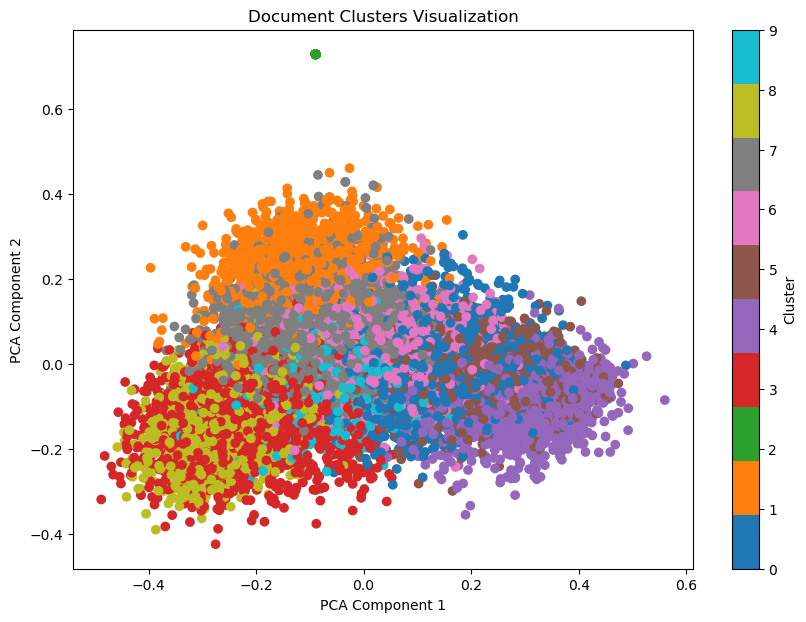

In [58]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(document_embeddings)

# Plot the clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='tab10')
plt.colorbar(scatter, label='Cluster')
plt.title('Document Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [63]:
# Group by LDA topic and cluster
grouped = df.groupby(['lda_topic', 'cluster']).size().reset_index(name='count')

print(grouped)


    lda_topic  cluster  count
0           0        0    107
1           0        1      4
2           0        2    312
3           0        3     15
4           0        4     10
..        ...      ...    ...
75          9        4   1233
76          9        5    434
77          9        6    104
78          9        7     55
79          9        9     12

[80 rows x 3 columns]


In [64]:
def get_keywords_for_topic(topic_id):
    feature_names = vectorizer.get_feature_names_out()
    topic_word_distribution = lda_model.components_[topic_id]
    top_words_idx = topic_word_distribution.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    return top_words

# Print keywords for each LDA topic
for topic in range(10):
    print(f"Topic {topic}: {', '.join(get_keywords_for_topic(topic))}")


Topic 0: space, file, db, entry, program, output, image, line, launch, use
Topic 1: ah, air, mv, gordon, mm, mw, ww, bank, md, mt
Topic 2: god, nt, people, say, think, jesus, christian, know, believe, like
Topic 3: people, nt, armenian, government, state, right, time, think, israel, jew
Topic 4: gun, key, law, use, encryption, government, chip, file, right, state
Topic 5: nt, know, like, think, time, car, good, year, going, said
Topic 6: ax, max, pl, bhj, giz, wm, gk, sl, bj, ql
Topic 7: file, available, information, program, use, window, email, list, server, version
Topic 8: game, team, year, player, play, season, new, league, hockey, win
Topic 9: drive, nt, problem, card, window, use, like, know, disk, thanks


### Visualization of the Results

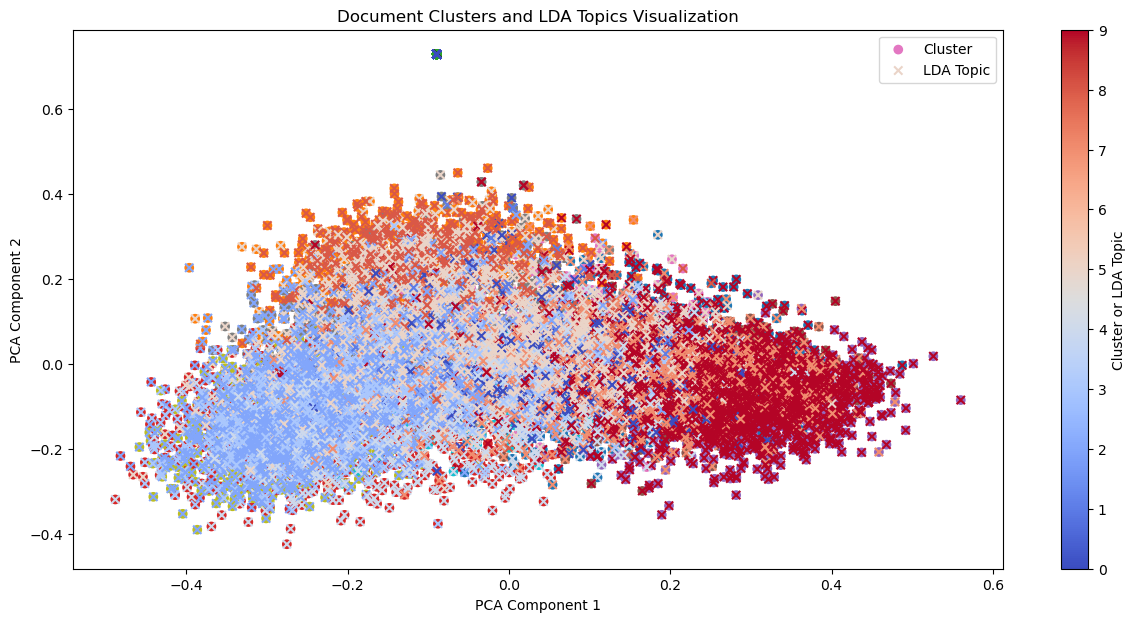

In [65]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(document_embeddings)

# Plot clusters
plt.figure(figsize=(15, 7))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='tab10', label='Cluster')
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=df['lda_topic'], cmap='coolwarm', marker='x', label='LDA Topic')
plt.colorbar(label='Cluster or LDA Topic')
plt.title('Document Clusters and LDA Topics Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


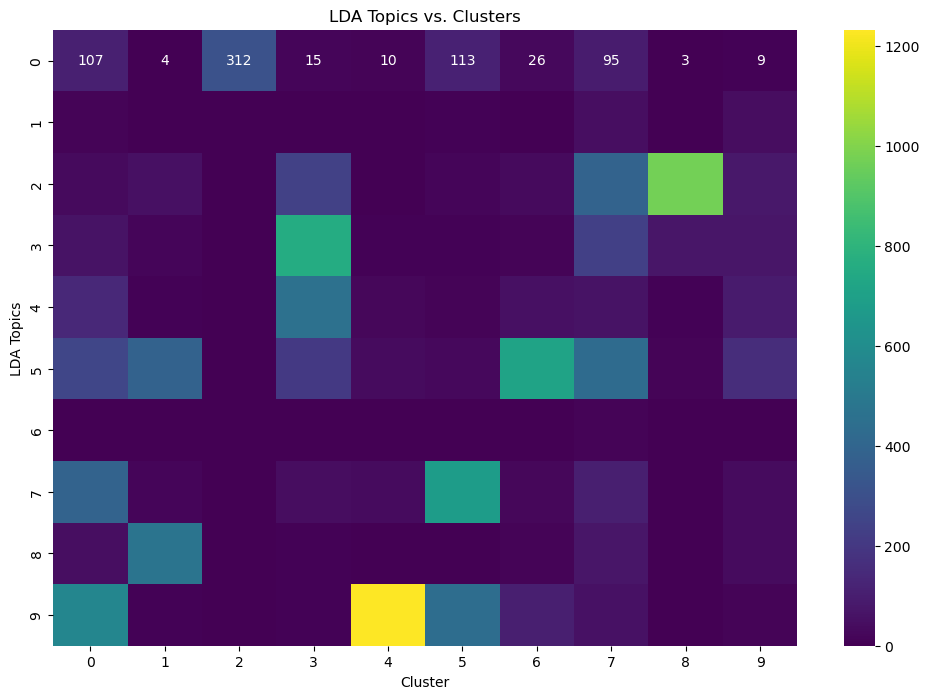

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame and has columns 'lda_topic' and 'cluster_labels'
# Example DataFrame setup
# df = pd.DataFrame({
#     'lda_topic': lda_topic_assignments,  # LDA topic assignments
#     'cluster_labels': cluster_labels    # Cluster assignments from K-Means
# })

# Create a contingency table
contingency_table = pd.crosstab(df['lda_topic'], df['cluster'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('LDA Topics vs. Clusters')
plt.xlabel('Cluster')
plt.ylabel('LDA Topics')
plt.show()


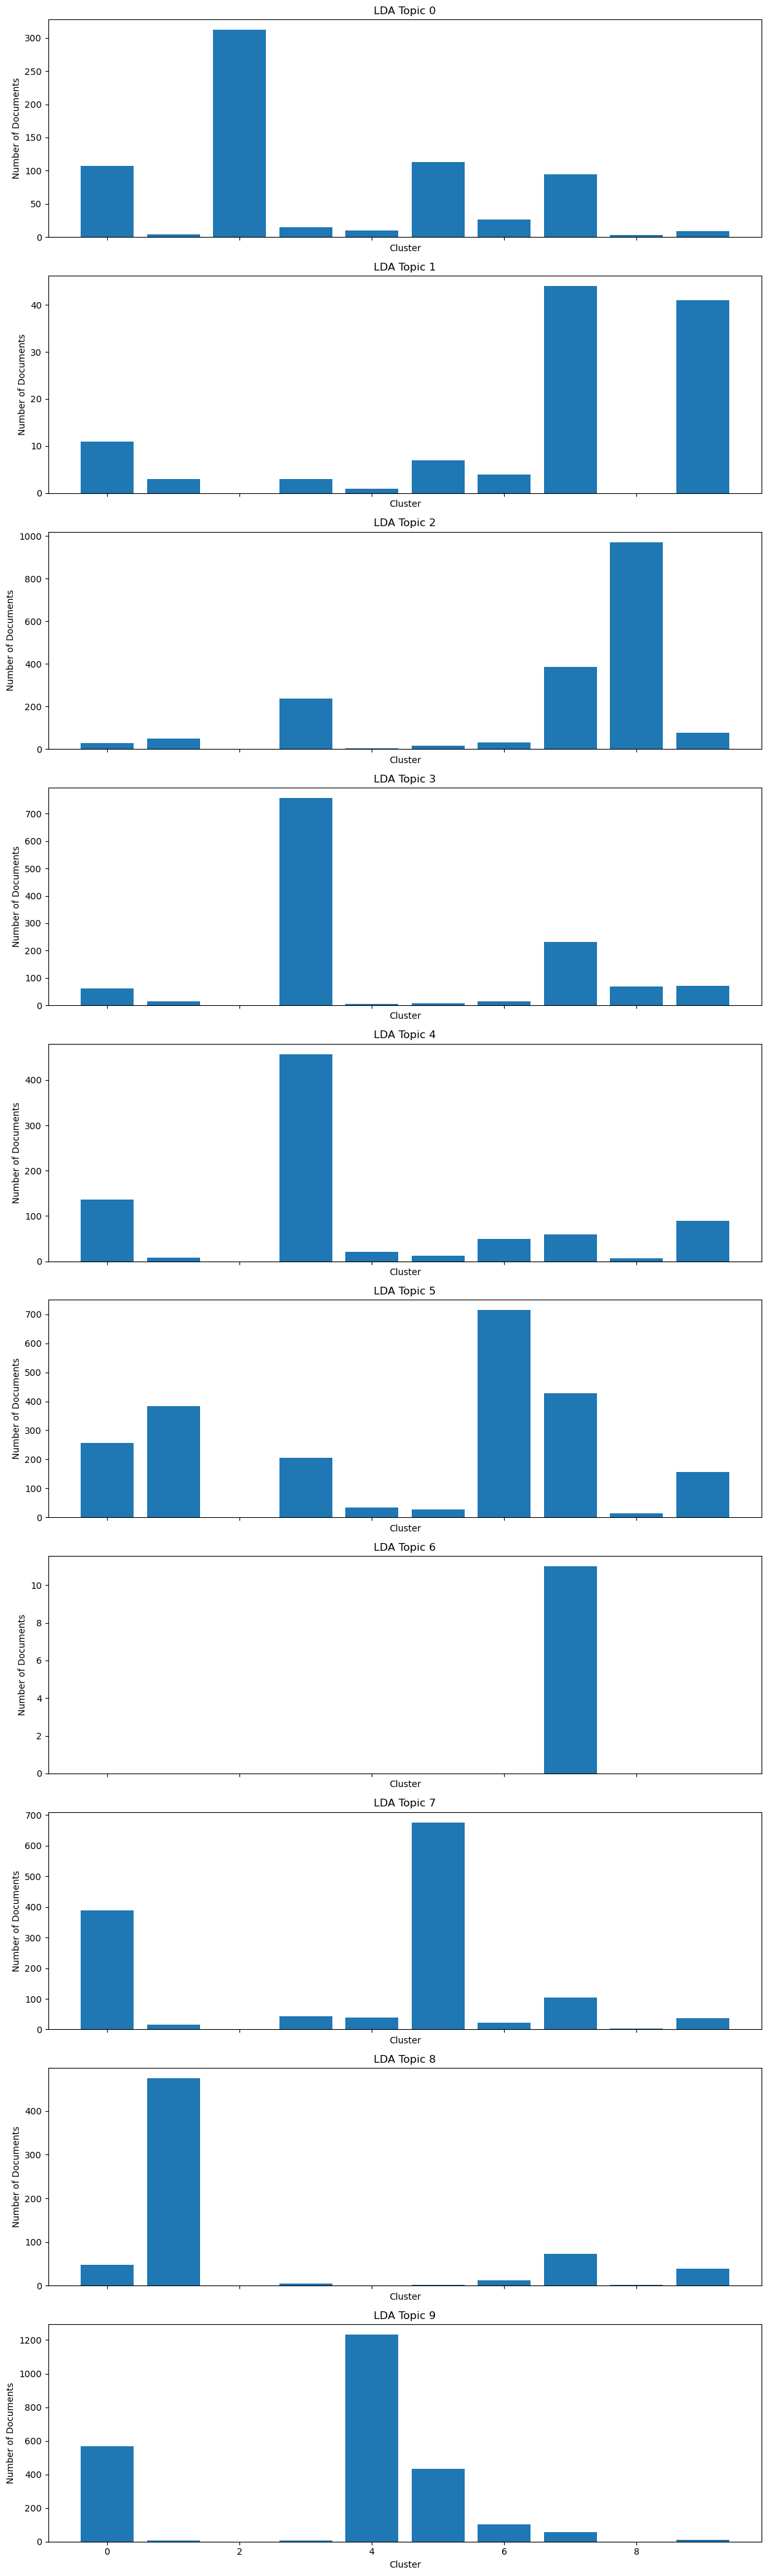

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame and has columns 'lda_topic' and 'cluster_labels'
# Example DataFrame setup
# df = pd.DataFrame({
#     'lda_topic': lda_topic_assignments,  # LDA topic assignments
#     'cluster_labels': cluster_labels    # Cluster assignments from K-Means
# })

# Create a contingency table
contingency_table = pd.crosstab(df['lda_topic'], df['cluster'])

# Plot bar plots for each LDA topic
topics = contingency_table.index
n_topics = len(topics)
n_clusters = contingency_table.columns

fig, axes = plt.subplots(n_topics, 1, figsize=(12, 4 * n_topics), sharex=True)

for i, topic in enumerate(topics):
    axes[i].bar(contingency_table.columns, contingency_table.loc[topic])
    axes[i].set_title(f'LDA Topic {topic}')
    axes[i].set_ylabel('Number of Documents')
    axes[i].set_xlabel('Cluster')

plt.tight_layout()
plt.show()


### Refining Models

In [68]:
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(df['cluster'], df['lda_topic'])


In [69]:
# Identify the most dominant LDA topic for each cluster
dominant_topics = contingency_table.idxmax(axis=1)

# Create a mapping of cluster to dominant LDA topic
cluster_to_topic = dominant_topics.to_dict()


In [71]:
# Map each cluster to its dominant LDA topic
df['adjusted_cluster'] = df['cluster'].map(cluster_to_topic)


In [72]:
adjusted_contingency_table = pd.crosstab(df['adjusted_cluster'], df['lda_topic'])

print(adjusted_contingency_table)


lda_topic           0   1    2    3    4     5   6    7    8     9
adjusted_cluster                                                  
0                 312   0    0    0    0     0   0    0    0     0
2                   3   0  972   69    7    13   0    4    1     0
3                  15   3  238  757  457   206   0   43    5     7
5                 130  89  496  318  199  1298  11  164  122   171
7                 113   7   15    6   12    28   0  676    2   434
8                   4   3   49   15    8   383   0   15  475     8
9                 117  12   34   67  157   290   0  427   47  1800


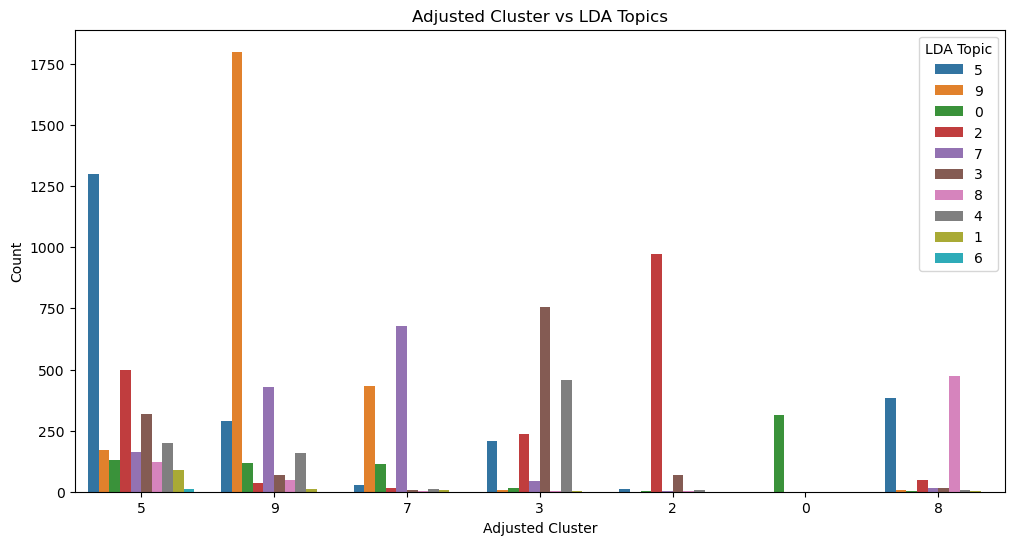

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the columns used for plotting are strings
df['adjusted_cluster'] = df['adjusted_cluster'].astype(str)
df['lda_topic'] = df['lda_topic'].astype(str)

# Plot the data
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='adjusted_cluster', hue='lda_topic')
plt.title('Adjusted Cluster vs LDA Topics')
plt.xlabel('Adjusted Cluster')
plt.ylabel('Count')
plt.legend(title='LDA Topic')
plt.show()
